<a href="https://colab.research.google.com/github/18bce133/Stock-market-Prdiction/blob/main/stock_market_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import sklearn
data = pd.read_csv('Train Data.csv')
data['Adj Close'][0]
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
item = []
Open = []
High=[]
Low=[]
Adj_Close = []
volume = []

    # Loop through the stock data objects backwards and store factors we want to keep
i_counter = 0
for i in range(len(data)):
  item.append(i_counter)
  Open.append(data['Open'][i])
  Adj_Close.append(data['Adj Close'][i])
  High.append(data['High'][i])
  Low.append(data['Low'][i])
  volume.append(data['Volume'][i])
  i_counter += 1

# Create a data frame for stock data
stocks = pd.DataFrame()

# Add factors to data frame
stocks['Item'] = item
stocks['Open'] = Open
stocks['High'] = High
stocks['Low']  = Low
stocks['Volume'] = pd.to_numeric(volume)
stocks['Adj Close'] = pd.to_numeric(Adj_Close)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item    Open         High          Low  Volume    Adj Close
0     0  2450.0  2542.550049  2431.000000    5572  2398.945068
1     1  2575.0  2598.000000  2530.300049    3620  2406.021484
2     2  2540.0  2599.000000  2422.550049    8347  2431.730957
3     3  2535.0  2560.000000  2470.000000    2831  2370.639404
4     4  2545.0  2555.000000  2480.000000    5054  2357.806885
---
      Item         Open     High          Low  Volume    Adj Close
3440  3440  67004.00000  67347.0  65897.00000    5788  65936.66406
3441  3441  66200.00000  67503.0  65105.19922    9920  67135.38281
3442  3442  67398.89844  67699.0  66526.00000    8775  66503.91406
3443  3443  67279.00000  67475.0  66980.00000    4257  66853.56250
3444  3444  67550.00000  67550.0  66812.39844    5943  66801.39844


**Stock Market Prediction Using Linear Regression**
>This is simple linear regression
 

---



In [ ]:
for sma_period in [5,10,20,50,100,200]:
    indicator_name = "SMA_%d" % (sma_period)
    data[indicator_name] = data['Adj Close'].rolling(sma_period).mean()

In [ ]:
#print(data)

In [ ]:
data['BollingerBand_Up_20_2'] = data['Adj Close'].rolling(20).mean() + 2*data['Adj Close'].rolling(20).std()
data['BollingerBand_Down_20_2'] = data['Adj Close'].rolling(20).mean() - 2*data['Adj Close'].rolling(20).std()
data['BollingerBand_Up_20_1'] = data['Adj Close'].rolling(20).mean() + data['Adj Close'].rolling(20).std()
data['BollingerBand_Down_20_1'] = data['Adj Close'].rolling(20).mean() - data['Adj Close'].rolling(20).std()
data['BollingerBand_Up_10_1'] = data['Adj Close'].rolling(10).mean() + data['Adj Close'].rolling(10).std()
data['BollingerBand_Down_10_1'] = data['Adj Close'].rolling(10).mean() - data['Adj Close'].rolling(10).std()
data['BollingerBand_Up_10_2'] = data['Adj Close'].rolling(10).mean() + 2*data['Adj Close'].rolling(10).std()
data['BollingerBand_Down_10_2'] = data['Adj Close'].rolling(10).mean() - 2*data['Adj Close'].rolling(10).std()

In [ ]:
for channel_period in [5,10,20,50,100,200]:
    up_name = "Donchian_Channel_Up_%d" % (channel_period)
    down_name = "Donchian_Channel_Down_%d" % (channel_period)
    
    data[up_name] = data['High'].rolling(channel_period).max()
    data[down_name] = data['Low'].rolling(channel_period).min()

In [ ]:
#print(data)

In [ ]:
newdata = data['Adj Close'].to_frame()
for lag in [1,2,3,4,5,6,7,8,9,10]:
    shift = lag
    shifted = data.shift(shift)
    shifted.columns = [str.format("%s_shifted_by_%d" % (column ,shift)) for column in shifted.columns]
    newdata = pd.concat((newdata,shifted),axis=1)

In [ ]:
forward_lag = 5
newdata['target'] = newdata['Adj Close'].shift(-forward_lag)
newdata = newdata.drop('Adj Close',axis=1)
newdata = newdata.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
X = newdata.drop("target",axis=1)
Y = newdata['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42,shuffle=False)
print(X_train.shape)

(2261, 310)


In [ ]:
correlations = np.abs(X_train.corrwith(y_train))
features_orig =  list(correlations.sort_values(ascending=False)[0:50].index)
X_train = X_train[features_orig]
X_test = X_test[features_orig]
print(features_orig)

['Adj Close_shifted_by_1', 'Low_shifted_by_1', 'High_shifted_by_1', 'Adj Close_shifted_by_2', 'Open_shifted_by_1', 'SMA_5_shifted_by_1', 'Low_shifted_by_2', 'High_shifted_by_2', 'Adj Close_shifted_by_3', 'Donchian_Channel_Up_5_shifted_by_1', 'Open_shifted_by_2', 'SMA_5_shifted_by_2', 'BollingerBand_Up_10_1_shifted_by_1', 'Donchian_Channel_Down_5_shifted_by_1', 'SMA_10_shifted_by_1', 'Low_shifted_by_3', 'High_shifted_by_3', 'Adj Close_shifted_by_4', 'Donchian_Channel_Up_5_shifted_by_2', 'BollingerBand_Up_10_2_shifted_by_1', 'SMA_5_shifted_by_3', 'Open_shifted_by_3', 'BollingerBand_Up_10_1_shifted_by_2', 'Donchian_Channel_Down_5_shifted_by_2', 'Donchian_Channel_Up_10_shifted_by_1', 'SMA_10_shifted_by_2', 'Low_shifted_by_4', 'High_shifted_by_4', 'Adj Close_shifted_by_5', 'SMA_5_shifted_by_4', 'Donchian_Channel_Up_5_shifted_by_3', 'Open_shifted_by_4', 'BollingerBand_Up_10_2_shifted_by_2', 'BollingerBand_Up_10_1_shifted_by_3', 'BollingerBand_Down_10_1_shifted_by_1', 'Donchian_Channel_Down_5

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)
train_pred=lr.predict(X_train)
total_pred=np.concatenate((train_pred,y_pred))
total_actual=np.concatenate((y_train,y_test))

In [ ]:
import pickle
prediction=open("final_prediction.pkl","wb")
pickle.dump(lr,prediction)
prediction.close()


In [ ]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred,squared=False))
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print(mape)

1944.305862128819
2452.0141296184565
0.9749108422787875
3.777191151994677


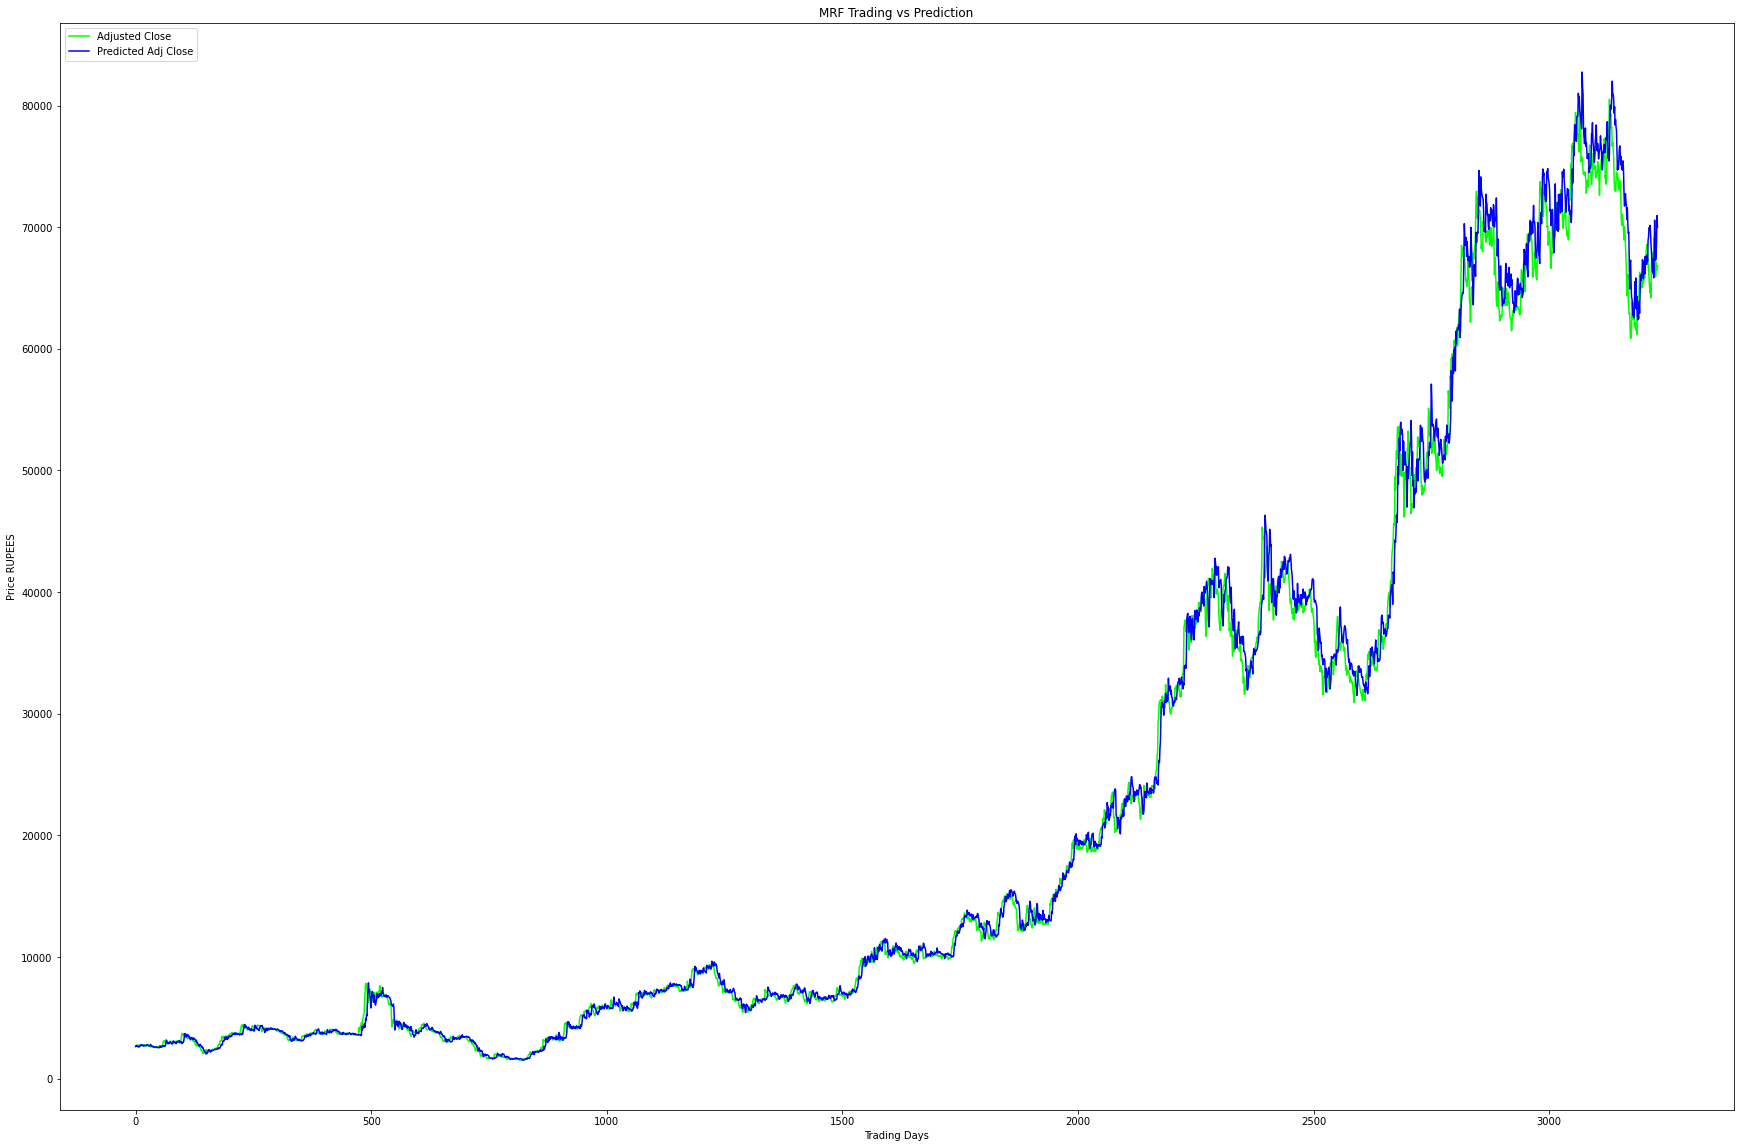

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30, 20)
fig = plt.figure()

ax = fig.add_subplot(111)
title='MRF Trading vs Prediction'
y_label='Price RUPEES'
x_label='Trading Days'
# Add labels
plt.ylabel(y_label)
plt.xlabel(x_label)

# Plot actual and predicted close values

plt.plot(total_actual, '#00FF00', label='Adjusted Close')
plt.plot(total_pred, '#0000FF', label='Predicted Adj Close')

# Set title
ax.set_title(title)
ax.legend(loc='upper left')


plt.show()


In [ ]:
model_pkl=open("final_prediction.pkl","rb")
model=pickle.load(model_pkl)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import pandas as pd
file_name=input("Enter the name of test file: ")
data = pd.read_csv(file_name)
data.columns=["Open","High","Low","Volume","Adj Close"]

Enter the name of test file: Train_data_1.csv


In [ ]:
for sma_period in [5,10,20,50,100,200]:
    indicator_name = "SMA_%d" % (sma_period)
    data[indicator_name] = data['Adj Close'].rolling(sma_period).mean()
   

In [ ]:
data['BollingerBand_Up_20_2'] = data['Adj Close'].rolling(20).mean() + 2*data['Adj Close'].rolling(20).std()
data['BollingerBand_Down_20_2'] = data['Adj Close'].rolling(20).mean() - 2*data['Adj Close'].rolling(20).std()
data['BollingerBand_Up_20_1'] = data['Adj Close'].rolling(20).mean() + data['Adj Close'].rolling(20).std()
data['BollingerBand_Down_20_1'] = data['Adj Close'].rolling(20).mean() - data['Adj Close'].rolling(20).std()
data['BollingerBand_Up_10_1'] = data['Adj Close'].rolling(10).mean() + data['Adj Close'].rolling(10).std()
data['BollingerBand_Down_10_1'] = data['Adj Close'].rolling(10).mean() - data['Adj Close'].rolling(10).std()
data['BollingerBand_Up_10_2'] = data['Adj Close'].rolling(10).mean() + 2*data['Adj Close'].rolling(10).std()
data['BollingerBand_Down_10_2'] = data['Adj Close'].rolling(10).mean() - 2*data['Adj Close'].rolling(10).std()

In [ ]:
for channel_period in [5,10,20,50,100,200]:
    up_name = "Donchian_Channel_Up_%d" % (channel_period)
    down_name = "Donchian_Channel_Down_%d" % (channel_period)
    
    data[up_name] = data['High'].rolling(channel_period).max()
    data[down_name] = data['Low'].rolling(channel_period).min()
print(data.shape)

(627, 31)


In [ ]:
newdata = data['Adj Close'].to_frame()
for lag in [1,2,3,4,5,6,7,8,9,10]:
    shift = lag
    shifted = data.shift(shift)
    shifted.columns = [str.format("%s_shifted_by_%d" % (column ,shift)) for column in shifted.columns]
    newdata = pd.concat((newdata,shifted),axis=1)
print(newdata.shape)

(627, 311)


In [ ]:
forward_lag = 5
newdata['target'] = newdata['Adj Close'].shift(-forward_lag)
newdata = newdata.drop('Adj Close',axis=1)
newdata = newdata.dropna()
print(newdata.shape)

(413, 311)


In [ ]:
X = newdata.drop("target",axis=1)
Y = newdata['target']

In [ ]:
X = X[features_orig]
print(features_orig)

['Adj Close_shifted_by_1', 'Low_shifted_by_1', 'High_shifted_by_1', 'Adj Close_shifted_by_2', 'Open_shifted_by_1', 'SMA_5_shifted_by_1', 'Low_shifted_by_2', 'High_shifted_by_2', 'Adj Close_shifted_by_3', 'Donchian_Channel_Up_5_shifted_by_1', 'Open_shifted_by_2', 'SMA_5_shifted_by_2', 'BollingerBand_Up_10_1_shifted_by_1', 'Donchian_Channel_Down_5_shifted_by_1', 'SMA_10_shifted_by_1', 'Low_shifted_by_3', 'High_shifted_by_3', 'Adj Close_shifted_by_4', 'Donchian_Channel_Up_5_shifted_by_2', 'BollingerBand_Up_10_2_shifted_by_1', 'SMA_5_shifted_by_3', 'Open_shifted_by_3', 'BollingerBand_Up_10_1_shifted_by_2', 'Donchian_Channel_Down_5_shifted_by_2', 'Donchian_Channel_Up_10_shifted_by_1', 'SMA_10_shifted_by_2', 'Low_shifted_by_4', 'High_shifted_by_4', 'Adj Close_shifted_by_5', 'SMA_5_shifted_by_4', 'Donchian_Channel_Up_5_shifted_by_3', 'Open_shifted_by_4', 'BollingerBand_Up_10_2_shifted_by_2', 'BollingerBand_Up_10_1_shifted_by_3', 'BollingerBand_Down_10_1_shifted_by_1', 'Donchian_Channel_Down_5

In [ ]:
import numpy
y_pred=model.predict(X)
numpy.set_printoptions(suppress=True)
mape = np.mean(np.abs((Y - y_pred)/Y))*100
print(mape)
#print(y_pred)
numpy.savetxt("Output.csv", y_pred, delimiter=",")

5.926735864937652
